   # EDA ON Flu Shot Learning: Predict H1N1 and Seasonal Flu Vaccines

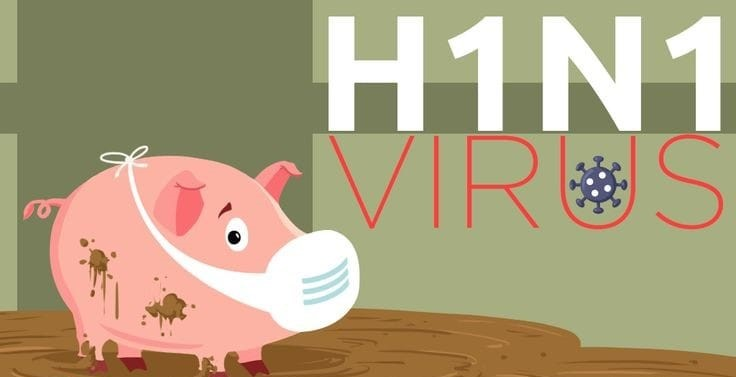

## Team Details

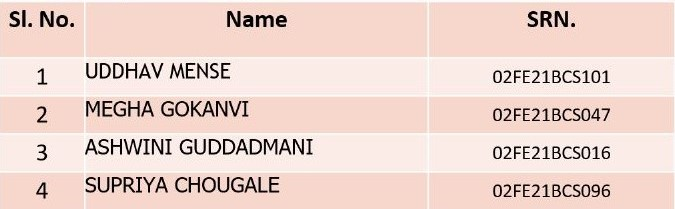

# Dataset Introduction

## Background

Beginning in spring 2009, a pandemic caused by the H1N1 influenza virus, commonly named "swine flu," swept across the world. 
Researchers estimate that in the first year, it was responsible for between 151,000 to 575,000 deaths globally.
A vaccine for the H1N1 flu virus became publicly available in October 2009.

### Problem Statement

Our goal is to predict how likely individuals are to receive their H1N1 and seasonal flu vaccines. Specifically, we will be predicting two probabilities: one for h1n1_vaccine and one for seasonal_vaccine.

# Dataset Collection

Flu Shot learning appeared as a challenge on DrivenData 
Data is provided courtesy of the United States National Center for Health Statistics
Source URL:
https://tinyurl.com/yckm2v9z

## Step-1: Dataset Details

- As seen above there are 36 columns. 
- But the 1st column is respondent_id, it can be used to index the rows. 
- We have to read the CSV through 1st index coloumn.

In [1]:
# Read the dataset
import numpy as np
import pandas as pd

df = pd.read_csv("test_set_features.csv", index_col='respondent_id')

Let us check the size of the dataset.

In [2]:
df.shape

(26708, 35)

There are 35 features in the dataset with 26708 samples.

Let us examine few entries in the dataset.

We have a dataset with 36 columns. The first column respondent_id is a unique and random identifier. The remaining 35 features are described below.

For all binary variables: 0 = No; 1 = Yes.

- h1n1_concern - Level of concern about the H1N1 flu.
- 0 = Not at all concerned; 1 = Not very concerned; 2 = Somewhat concerned; 3 = Very concerned.
- h1n1_knowledge - Level of knowledge about H1N1 flu.
- 0 = No knowledge; 1 = A little knowledge; 2 = A lot of knowledge.
- behavioral_antiviral_meds - Has taken antiviral medications. (binary)
- behavioral_avoidance - Has avoided close contact with others with flu-like symptoms. (binary)
- behavioral_face_mask - Has bought a face mask. (binary)
- behavioral_wash_hands - Has frequently washed hands or used hand sanitizer. (binary)
- behavioral_large_gatherings - Has reduced time at large gatherings. (binary)
- behavioral_outside_home - Has reduced contact with people outside of own household. (binary)
- behavioral_touch_face - Has avoided touching eyes, nose, or mouth. (binary)
- doctor_recc_h1n1 - H1N1 flu vaccine was recommended by doctor. (binary)
- doctor_recc_seasonal - Seasonal flu vaccine was recommended by doctor. (binary)
- chronic_med_condition - Has any of the following chronic medical conditions: asthma or an other lung condition, diabetes, a heart condition, a kidney condition, sickle cell anemia or other anemia, a neurological or neuromuscular condition, a liver condition, or a weakened immune system caused by a chronic illness or by medicines taken for a chronic illness. (binary)
- child_under_6_months - Has regular close contact with a child under the age of six months. (binary)
- health_worker - Is a healthcare worker. (binary)
- health_insurance - Has health insurance. (binary)
- opinion_h1n1_vacc_effective - Respondent's opinion about H1N1 vaccine effectiveness.
- 1 = Not at all effective; 2 = Not very effective; 3 = Don't know; 4 = Somewhat effective; 5 = Very effective.
- opinion_h1n1_risk - Respondent's opinion about risk of getting sick with H1N1 flu without vaccine.
- 1 = Very Low; 2 = Somewhat low; 3 = Don't know; 4 = Somewhat high; 5 = Very high.
- opinion_h1n1_sick_from_vacc - Respondent's worry of getting sick from taking H1N1 vaccine.
- 1 = Not at all worried; 2 = Not very worried; 3 = Don't know; 4 = Somewhat worried; 5 = Very worried.
- opinion_seas_vacc_effective - Respondent's opinion about seasonal flu vaccine effectiveness.
- 1 = Not at all effective; 2 = Not very effective; 3 = Don't know; 4 = Somewhat effective; 5 = Very effective.
- opinion_seas_risk - Respondent's opinion about risk of getting sick with seasonal flu without vaccine.
- 1 = Very Low; 2 = Somewhat low; 3 = Don't know; 4 = Somewhat high; 5 = Very high.
- opinion_seas_sick_from_vacc - Respondent's worry of getting sick from taking seasonal flu vaccine.
- 1 = Not at all worried; 2 = Not very worried; 3 = Don't know; 4 = Somewhat worried; 5 = Very worried.
- age_group - Age group of respondent.
- education - Self-reported education level.
- race - Race of respondent.
- sex - Sex of respondent.
- income_poverty - Household annual income of respondent with respect to 2008 Census poverty thresholds.
- marital_status - Marital status of respondent.
- rent_or_own - Housing situation of respondent.
- employment_status - Employment status of respondent.
- hhs_geo_region - Respondent's residence using a 10-region geographic classification defined by the U.S. Dept. of Health and Human Services. Values are represented as short random character strings.
- census_msa - Respondent's residence within metropolitan statistical areas (MSA) as defined by the U.S. Census.
- household_adults - Number of other adults in household, top-coded to 3.
- household_children - Number of children in household, top-coded to 3.
- employment_industry - Type of industry respondent is employed in. Values are represented as short random character strings.
- employment_occupation - Type of occupation of respondent. Values are represented as short random character strings.

In [3]:
# Examin the features of the dataset.
df.head(3)

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
respondent_id,,,,,,,,,,,,,,,,,,,,,
26707,2.0,2.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,"> $75,000",Not Married,Rent,Employed,mlyzmhmf,"MSA, Not Principle City",1.0,0.0,atmlpfrs,hfxkjkmi
26708,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,Non-MSA,3.0,0.0,atmlpfrs,xqwwgdyp
26709,2.0,2.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,...,"> $75,000",Married,Own,Employed,lrircsnp,Non-MSA,1.0,0.0,nduyfdeo,pvmttkik


Let us examin the features now.

In [4]:
# Examin the dataset details.
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26708 entries, 26707 to 1
Data columns (total 35 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   h1n1_concern                 26623 non-null  float64
 1   h1n1_knowledge               26586 non-null  float64
 2   behavioral_antiviral_meds    26629 non-null  float64
 3   behavioral_avoidance         26495 non-null  float64
 4   behavioral_face_mask         26689 non-null  float64
 5   behavioral_wash_hands        26668 non-null  float64
 6   behavioral_large_gatherings  26636 non-null  float64
 7   behavioral_outside_home      26626 non-null  float64
 8   behavioral_touch_face        26580 non-null  float64
 9   doctor_recc_h1n1             24548 non-null  float64
 10  doctor_recc_seasonal         24548 non-null  float64
 11  chronic_med_condition        25776 non-null  float64
 12  child_under_6_months         25895 non-null  float64
 13  health_worker        

In [5]:
df.describe()


,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,household_adults,household_children
count,26623.000000,26586.000000,26629.000000,26495.000000,26689.000000,26668.000000,26636.000000,26626.000000,26580.000000,24548.000000,...,25919.000000,14480.000000,26310.000000,26328.000000,26333.000000,26256.000000,26209.000000,26187.000000,26483.000000,26483.000000
mean,1.623145,1.266042,0.049645,0.729798,0.069279,0.826084,0.351517,0.337227,0.683747,0.222666,...,0.111501,0.887914,3.844622,2.326838,2.360612,4.024832,2.708688,2.143392,0.894310,0.543745
std,0.902755,0.615617,0.217215,0.444072,0.253934,0.379045,0.477453,0.472772,0.465022,0.416044,...,0.314758,0.315483,1.007570,1.275636,1.359413,1.083204,1.376045,1.339102,0.754244,0.935057
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,3.000000,1.000000,1.000000,4.000000,2.000000,1.000000,0.000000,0.000000
50%,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,1.000000,4.000000,2.000000,2.000000,4.000000,2.000000,2.000000,1.000000,0.000000
75%,2.000000,2.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,...,0.000000,1.000000,5.000000,4.000000,4.000000,5.000000,4.000000,4.000000,1.000000,1.000000
max,3.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,3.000000,3.000000


## Step-2: Missing Values

We observe that few features do not have 891 count. There are missing values. Let's find out their count.

In [6]:
df.isnull().sum()

h1n1_concern                      85
h1n1_knowledge                   122
behavioral_antiviral_meds         79
behavioral_avoidance             213
behavioral_face_mask              19
behavioral_wash_hands             40
behavioral_large_gatherings       72
behavioral_outside_home           82
behavioral_touch_face            128
doctor_recc_h1n1                2160
doctor_recc_seasonal            2160
chronic_med_condition            932
child_under_6_months             813
health_worker                    789
health_insurance               12228
opinion_h1n1_vacc_effective      398
opinion_h1n1_risk                380
opinion_h1n1_sick_from_vacc      375
opinion_seas_vacc_effective      452
opinion_seas_risk                499
opinion_seas_sick_from_vacc      521
age_group                          0
education                       1407
race                               0
sex                                0
income_poverty                  4497
marital_status                  1442
r

## Missing Values

In [7]:
print(df.nunique())

h1n1_concern                    4
h1n1_knowledge                  3
behavioral_antiviral_meds       2
behavioral_avoidance            2
behavioral_face_mask            2
behavioral_wash_hands           2
behavioral_large_gatherings     2
behavioral_outside_home         2
behavioral_touch_face           2
doctor_recc_h1n1                2
doctor_recc_seasonal            2
chronic_med_condition           2
child_under_6_months            2
health_worker                   2
health_insurance                2
opinion_h1n1_vacc_effective     5
opinion_h1n1_risk               5
opinion_h1n1_sick_from_vacc     5
opinion_seas_vacc_effective     5
opinion_seas_risk               5
opinion_seas_sick_from_vacc     5
age_group                       5
education                       4
race                            4
sex                             2
income_poverty                  3
marital_status                  2
rent_or_own                     2
employment_status               3
hhs_geo_region

## Data Visualization

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
import warnings
warnings.filterwarnings('ignore')

In [10]:
%matplotlib inline

<Axes: xlabel='h1n1_concern', ylabel='doctor_recc_h1n1'>

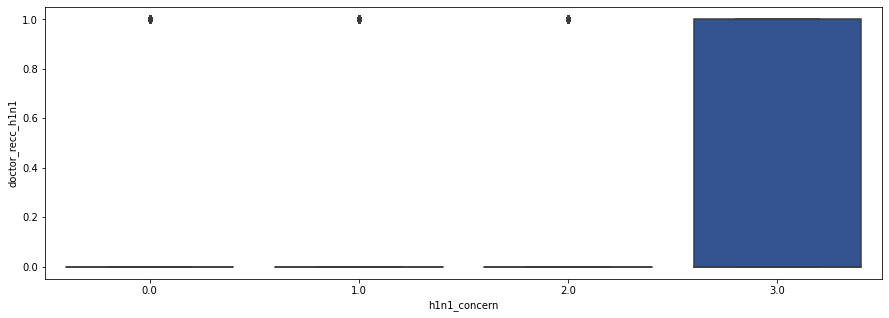

In [11]:
plt.figure(figsize=(15,5))
sns.boxplot(x='h1n1_concern', y='doctor_recc_h1n1', data=df, palette='YlGnBu')

doctor reccommends h1n1_vaccine when a person is very concerned(3)

<Axes: xlabel='h1n1_concern', ylabel='doctor_recc_seasonal'>

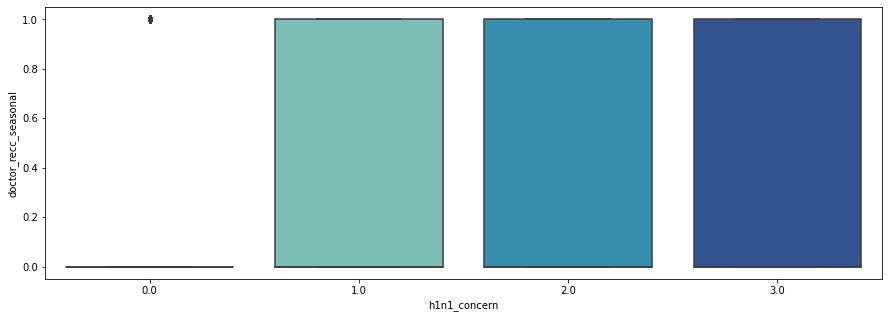

In [12]:
plt.figure(figsize=(15,5))
sns.boxplot(x='h1n1_concern', y='doctor_recc_seasonal', data=df, palette='YlGnBu')

Doctor reccommends seasonal flu vaccine when a person is not very concerned,somewhat concerned,very concerned that implies doctor has recommed it even if a person has a very little symptom

<Axes: xlabel='h1n1_concern', ylabel='doctor_recc_h1n1'>

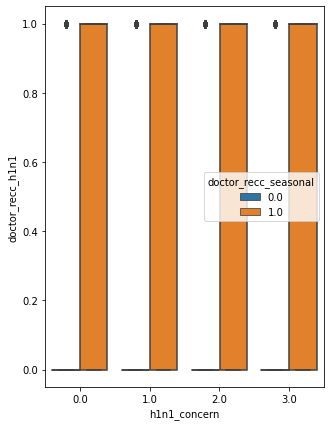

In [13]:
 plt.figure(figsize=(5,7))
sns.boxplot (y ='doctor_recc_h1n1', x ='h1n1_concern', data = df, hue ='doctor_recc_seasonal')

<Axes: xlabel='h1n1_concern', ylabel='doctor_recc_seasonal'>

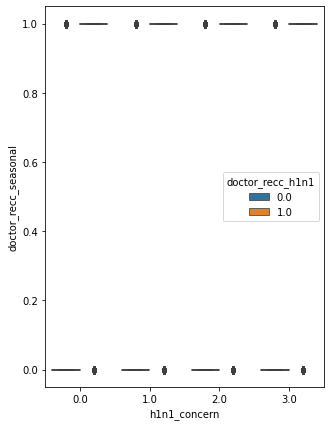

In [14]:
 plt.figure(figsize=(5,7))
sns.boxplot (y ='doctor_recc_seasonal', x ='h1n1_concern', data = df, hue ='doctor_recc_h1n1')

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## Distribution plot

Text(0.5, 1.0, 'Distribution of people that are concerned')

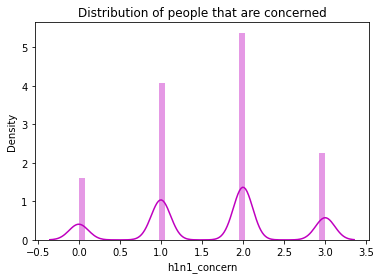

In [16]:
sns.distplot(a=df['h1n1_concern'], bins=40, color='m')
plt.title('Distribution of people that are concerned')

Majority of people are somewhat concerned i.e people with little symptoms

Text(0.5, 1.0, 'Distribution of people reccommed with h1n1 vaccine')

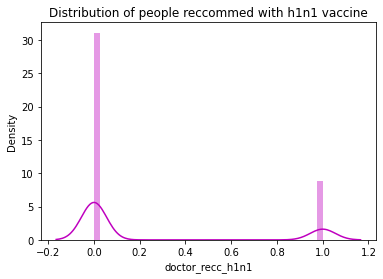

In [17]:
sns.distplot(a=df['doctor_recc_h1n1'], bins=40, color='m')
plt.title('Distribution of people reccommed with h1n1 vaccine')

Doctoe has not reccommed h1n1 vaccine to majority of people

Text(0.5, 1.0, 'Distribution of people reccommed with seasonal vaccine')

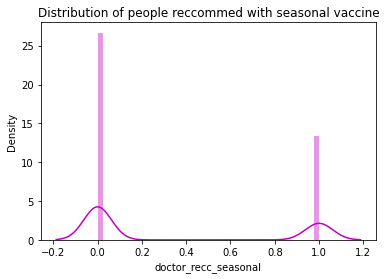

In [18]:
sns.distplot(a=df['doctor_recc_seasonal'], bins=40, color='m')
plt.title('Distribution of people reccommed with seasonal vaccine')

Accoeding to distribution graphs doctor has recommended seasonal vaccine as compared to h1n1 vaccine having that majority of people are somewhat concerned

Text(0.5, 1.0, 'Distribution of people with chronic med conditions')

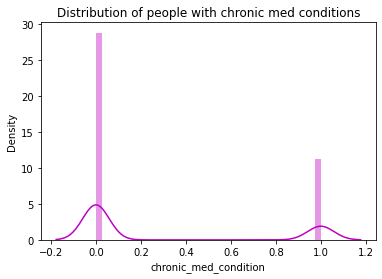

In [19]:
sns.distplot(a=df['chronic_med_condition'], bins=40, color='m')
plt.title('Distribution of people with chronic med conditions')

Majority of people are not suffering from chronic medical conditions

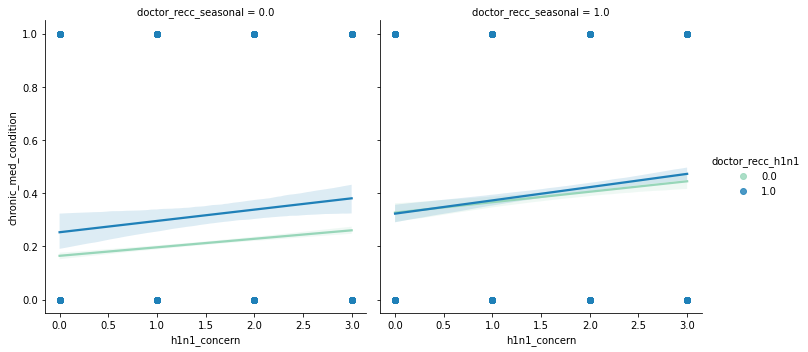

In [25]:
sns.lmplot(x = 'h1n1_concern', y = 'chronic_med_condition', data = df, col = 'doctor_recc_seasonal',
           hue = 'doctor_recc_h1n1', palette = 'YlGnBu')

### Scatter plot

[Text(0.5, 0, 'age_group'), Text(0, 0.5, 'behavioral_large_gatherings')]

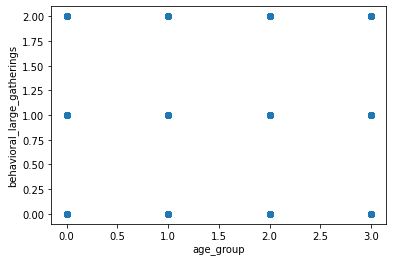

In [43]:
ax = plt.axes()

ax.scatter(df.h1n1_concern, df.h1n1_knowledge)

# Label the axes
ax.set(xlabel='age_group',
       ylabel='behavioral_large_gatherings')
       

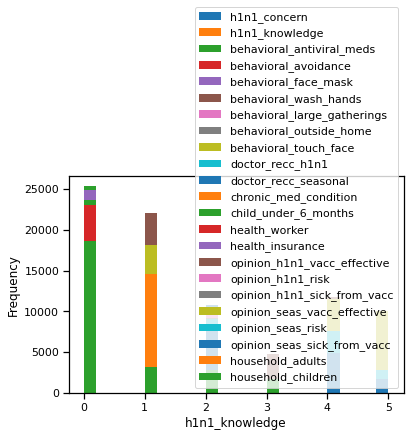

In [48]:
import seaborn as sns
sns.set_context('notebook')


ax = df.plot.hist(bins=25, alpha=1)
ax.set_xlabel('h1n1_knowledge');

In [49]:
# First we have to reshape the data so there is 
# only a single measurement in each column

plot_data = (df
             .set_index('h1n1_concern')
             .stack()
             .to_frame()
             .reset_index()
             .rename(columns={0:'size', 'level_1':'measurement'})
            )

plot_data.head()

,h1n1_concern,measurement,size
0,2.0,h1n1_knowledge,2.0
1,2.0,behavioral_antiviral_meds,0.0
2,2.0,behavioral_avoidance,1.0
3,2.0,behavioral_face_mask,0.0
4,2.0,behavioral_wash_hands,1.0


## Data perprocessing

### Data cleaning

Looking at the dataset we came to a decision that 

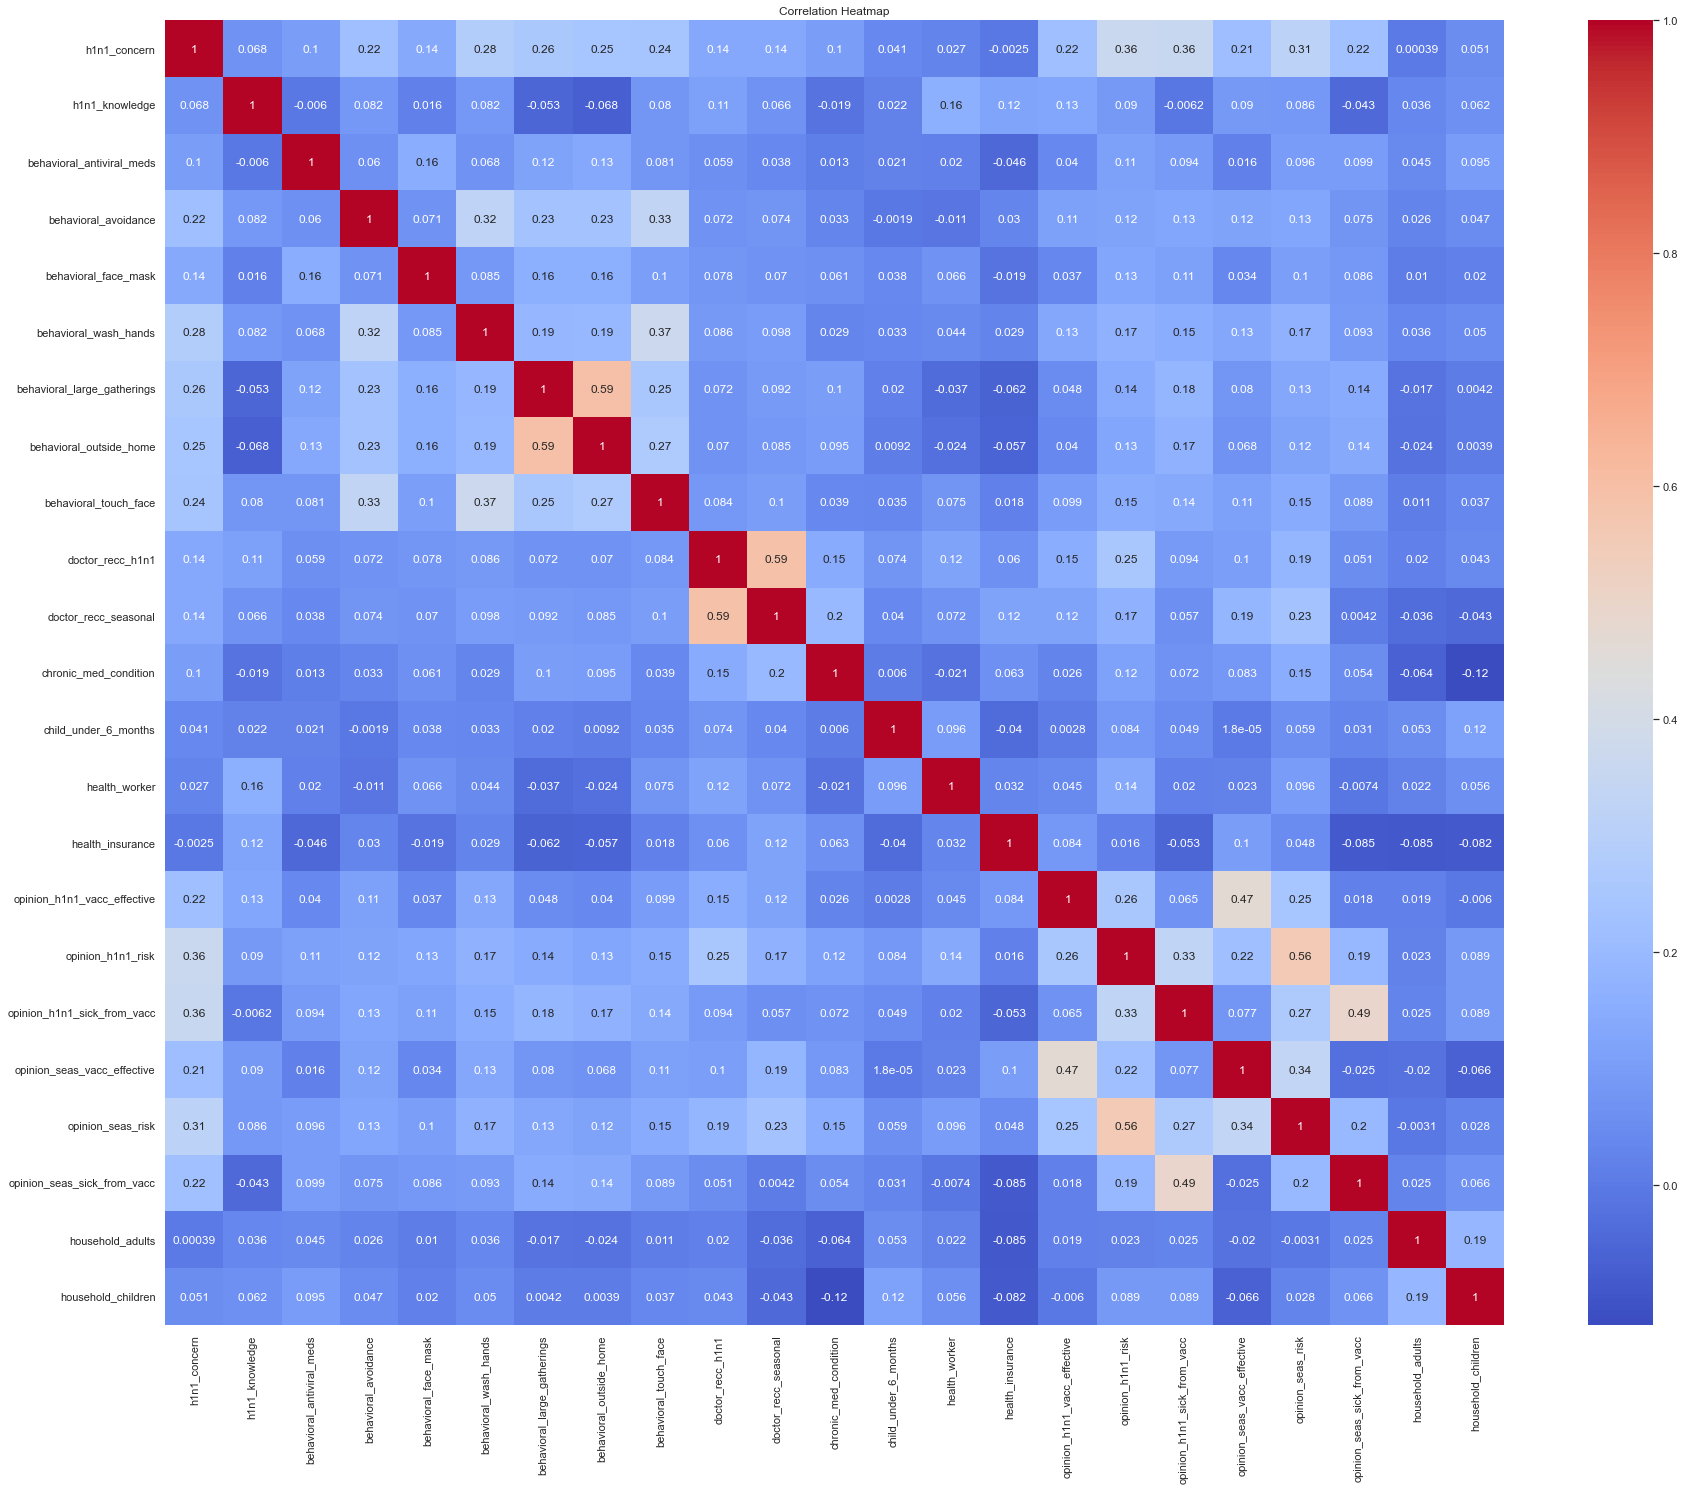

In [53]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your dataset is stored in a DataFrame called 'df' with numerical features

# Filter numerical features from the DataFrame
numerical_features = df.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix
correlation_matrix = numerical_features.corr()

# Create a heatmap for the correlation matrix
plt.figure(figsize=(30, 24))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [58]:
import pandas as pd

# Read the H1N1 flu dataset from CSV
df = pd.read_csv('test_set_features.csv')

# Remove duplicates
df.drop_duplicates(inplace=True)

# Remove unnecessary columns
columns_to_drop = ['rent_or_own', 'opinion_seas_sick_from_vacc', 'opinion_h1n1_sick_from_vacc', 'behavioral_outside_home', 'behavioral_large_gatherings','household_adults','household_children']  # Replace with the actual unnecessary column names
df.drop(columns=columns_to_drop, inplace=True)

# Handling missing values
df.dropna(inplace=True)  # Remove rows with any missing values
# Or, fill missing values with a specific value
# df.fillna(value, inplace=True)

# Convert categorical variables to numerical representations
categorical_columns = ['age_group', 'income_poverty','doctor_recc_seasonal','doctor_recc_h1n1','h1n1_concern']  # Replace with the actual categorical column names
df = pd.get_dummies(df, columns=categorical_columns)

# Normalize numeric columns
#numeric_columns = ['household_adults', 'household_children']  # Replace with the actual numeric column names
#for column in numeric_columns:
    #df[column] = (df[column] - df[column].mean()) / df[column].std()

# Save the cleaned dataset to a new CSV file
#df.to_csv('cleaned_h1n1_flu_dataset.csv', index=False)


In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6558 entries, 0 to 26704
Data columns (total 40 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   respondent_id                             6558 non-null   int64  
 1   h1n1_knowledge                            6558 non-null   float64
 2   behavioral_antiviral_meds                 6558 non-null   float64
 3   behavioral_avoidance                      6558 non-null   float64
 4   behavioral_face_mask                      6558 non-null   float64
 5   behavioral_wash_hands                     6558 non-null   float64
 6   behavioral_touch_face                     6558 non-null   float64
 7   chronic_med_condition                     6558 non-null   float64
 8   child_under_6_months                      6558 non-null   float64
 9   health_worker                             6558 non-null   float64
 10  health_insurance                        

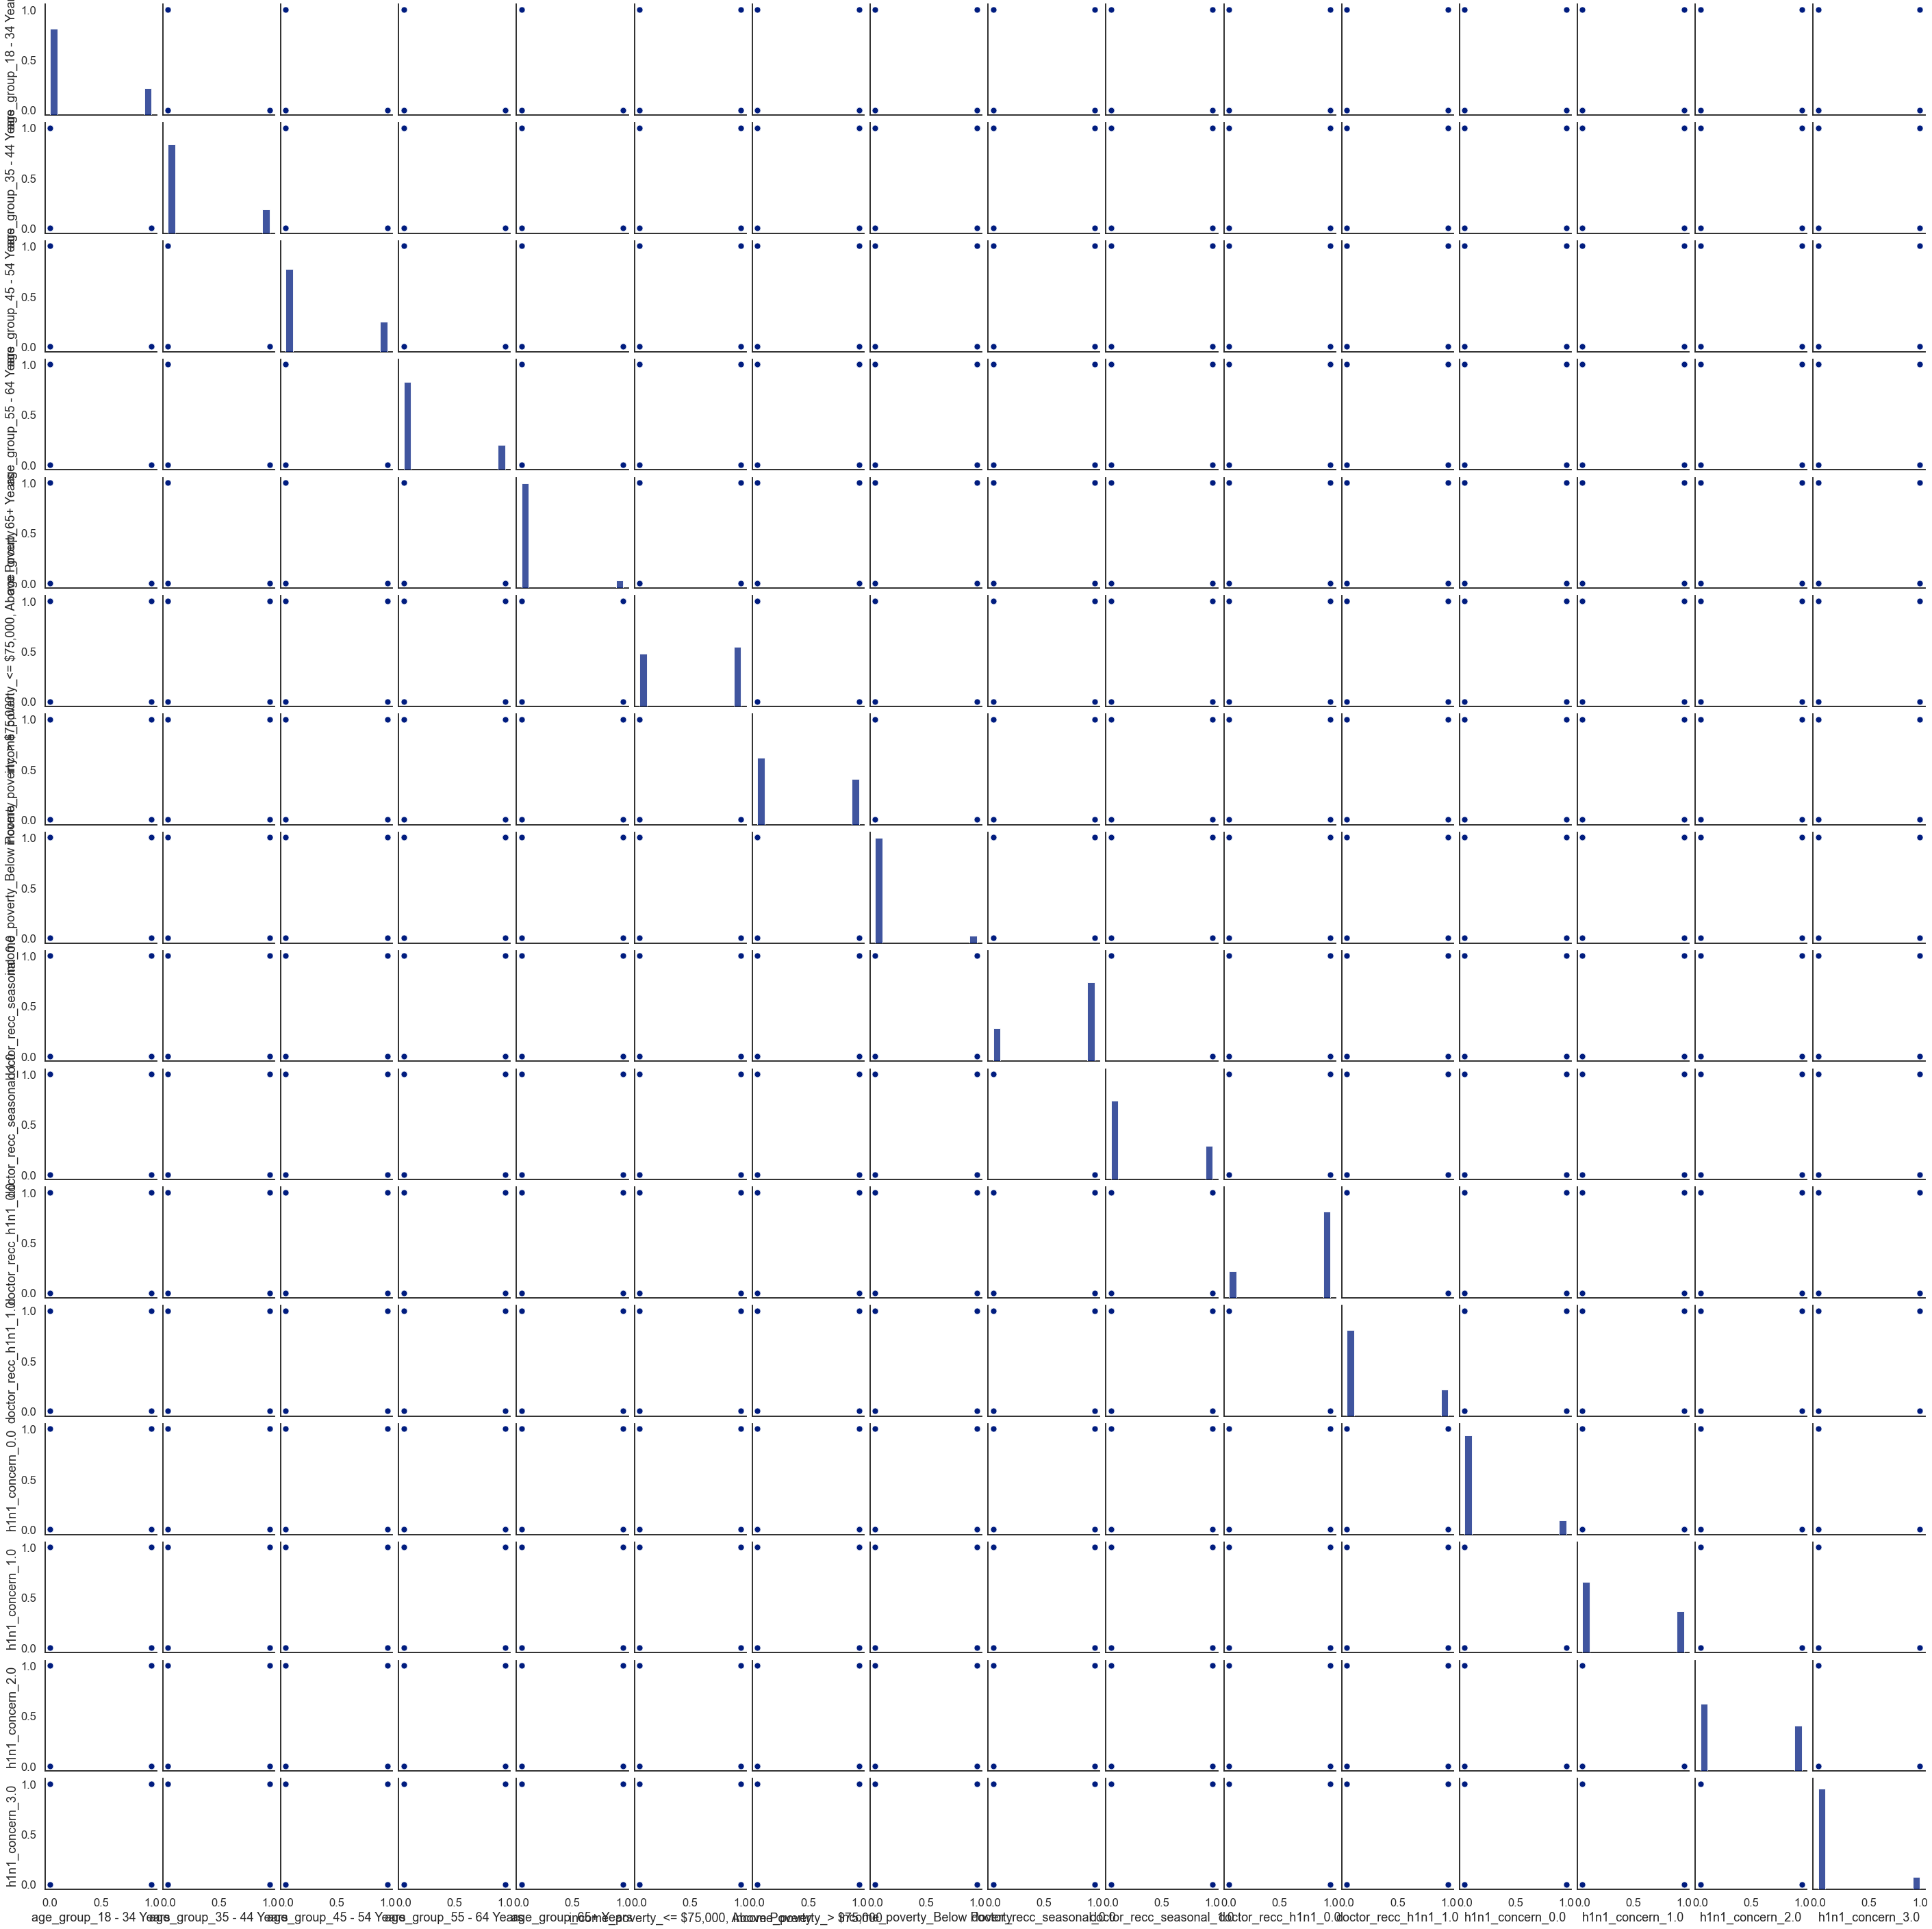

In [60]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have loaded the dataset into a DataFrame 'df'

# Get the list of boolean columns in the DataFrame
boolean_columns = df.select_dtypes(include='bool').columns

# Create a new DataFrame with only boolean columns
df_boolean = df[boolean_columns]

# Create pair plots for boolean features
sns.set_context('talk')  # Optional: Set the plot context to 'talk' (larger fonts and spacing)
sns.pairplot(df_boolean, diag_kind='hist')  # Use 'hist' to plot histograms on the diagonal
plt.show()


In [ ]:
import pandas as pd

def preprocess_data(test_set_features.csv):
    # Read the CSV file into a DataFrame
    df = pd.read_csv(test_set_features.csv)
    
    # Convert string column to lowercase
    df['column_name'] = df['column_name'].str.lower()
    
    # Print the modified column
    print(df['column_name'])

# Example usage
csv_file = 'data.csv'
preprocess_data(csv_file)

In [63]:
import pandas as pd

# Assuming you have loaded the dataset into a DataFrame 'df'

# Create a dictionary to map the old feature names to the new feature names
# Replace the keys with the old feature names and the values with the new feature names
# For example, to change 'old_feature1' to 'new_feature1' and 'old_feature2' to 'new_feature2':
feature_name_mapping = {
    'opinion_h1n1_vacc_effective ': 'ohe',
    ' opinion_seas_vacc_effective': 'ose',
    # Add more mappings as needed
}

# Rename the columns using the dictionary
df.rename(columns=feature_name_mapping, inplace=True)

# Now, the feature names in the DataFrame 'df' will be updated according to the specified mapping


In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6558 entries, 0 to 26704
Data columns (total 40 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   respondent_id                             6558 non-null   int64  
 1   h1n1_knowledge                            6558 non-null   float64
 2   behavioral_antiviral_meds                 6558 non-null   float64
 3   behavioral_avoidance                      6558 non-null   float64
 4   behavioral_face_mask                      6558 non-null   float64
 5   behavioral_wash_hands                     6558 non-null   float64
 6   behavioral_touch_face                     6558 non-null   float64
 7   chronic_med_condition                     6558 non-null   float64
 8   child_under_6_months                      6558 non-null   float64
 9   health_worker                             6558 non-null   float64
 10  health_insurance                        

In [66]:
pip install dython

Note: you may need to restart the kernel to use updated packages.


In [67]:
from dython.nominal import identify_nominal_columns
categorical_features=identify_nominal_columns(df)
categorical_features

['education',
 'race',
 'sex',
 'marital_status',
 'employment_status',
 'hhs_geo_region',
 'census_msa',
 'employment_industry',
 'employment_occupation']

In [68]:
import pandas as pd

# Assuming you have a dataset stored in a pandas DataFrame
# Replace 'df' with the actual name of your DataFrame

# Get the list of column names with categorical data
categorical_columns = df.select_dtypes(include='object').columns

# Iterate over the categorical columns and calculate frequency counts
for column in categorical_columns:
    frequency_count = df[column].value_counts()
    print(frequency_count)
    print()  # Print a blank line between the frequency counts of different columns

education
College Graduate    3254
Some College        1769
12 Years            1187
< 12 Years           348
Name: count, dtype: int64

race
White                5328
Hispanic              457
Black                 453
Other or Multiple     320
Name: count, dtype: int64

sex
Female    3620
Male      2938
Name: count, dtype: int64

marital_status
Married        3818
Not Married    2740
Name: count, dtype: int64

employment_status
Employed    6558
Name: count, dtype: int64

hhs_geo_region
lzgpxyit    958
fpwskwrf    837
oxchjgsf    791
qufhixun    745
bhuqouqj    739
kbazzjca    645
atmpeygn    529
mlyzmhmf    512
lrircsnp    504
dqpwygqj    298
Name: count, dtype: int64

census_msa
MSA, Not Principle  City    2991
MSA, Principle City         1924
Non-MSA                     1643
Name: count, dtype: int64

employment_industry
fcxhlnwr    1243
wxleyezf     913
ldnlellj     600
pxcmvdjn     516
arjwrbjb     439
atmlpfrs     395
xicduogh     395
mfikgejo     311
vjjrobsf     277
rucpziij  

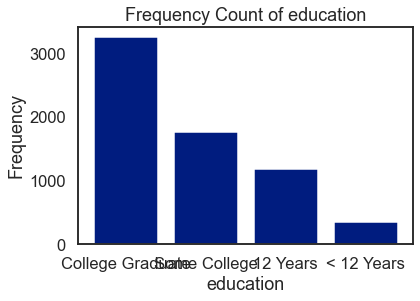

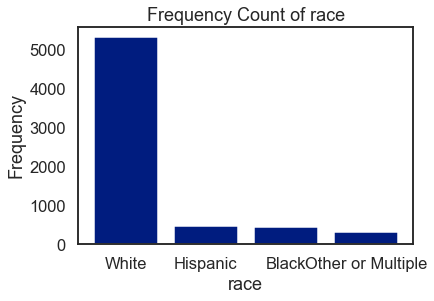

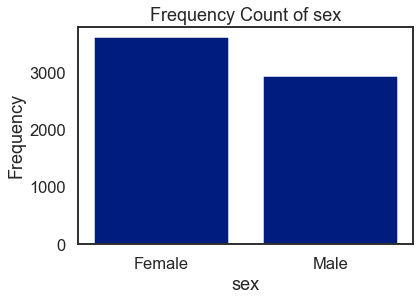

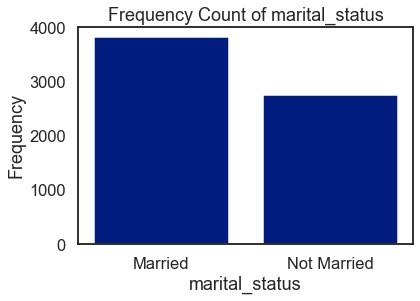

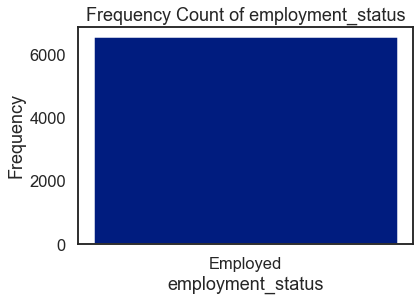

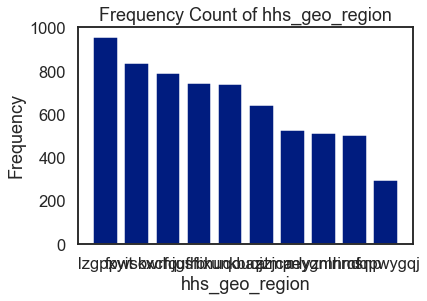

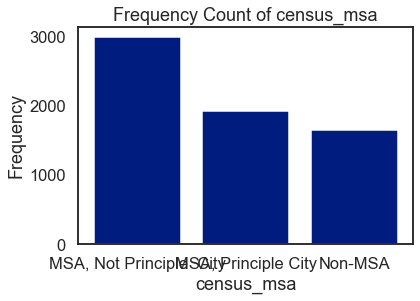

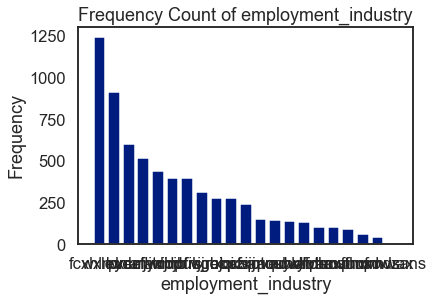

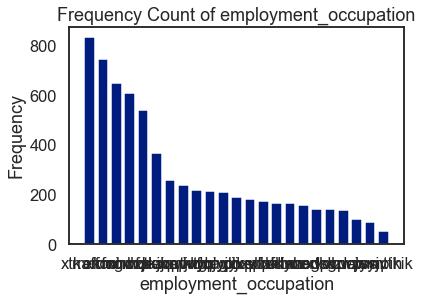

In [69]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have a dataset stored in a pandas DataFrame
# Replace 'df' with the actual name of your DataFrame

# Get the list of column names with categorical data
categorical_columns = df.select_dtypes(include='object').columns

# Iterate over the categorical columns and plot the frequency counts
for column in categorical_columns:
    frequency_count = df[column].value_counts()
    
    # Create the bar plot
    plt.bar(frequency_count.index, frequency_count.values)
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.title('Frequency Count of ' + column)
    plt.show()

In [70]:
import pandas as pd

# Assuming you have a dataset stored in a pandas DataFrame
# Replace 'df' with the actual name of your DataFrame

# Get the list of column names with categorical data
categorical_columns = df.select_dtypes(include='object').columns

# Perform cross-tabulation for each pair of categorical columns
for i in range(len(categorical_columns)):
    for j in range(i+1, len(categorical_columns)):
        column1 = categorical_columns[i]
        column2 = categorical_columns[j]
        cross_tab = pd.crosstab(df[column1], df[column2])
        print(f"Cross-tabulation between {column1} and {column2}:\n")
        print(cross_tab)
        print()

Cross-tabulation between education and race:

race              Black  Hispanic  Other or Multiple  White
education                                                  
12 Years            100       119                 52    916
< 12 Years           38       114                 21    175
College Graduate    163       120                162   2809
Some College        152       104                 85   1428

Cross-tabulation between education and sex:

sex               Female  Male
education                     
12 Years             618   569
< 12 Years           161   187
College Graduate    1790  1464
Some College        1051   718

Cross-tabulation between education and marital_status:

marital_status    Married  Not Married
education                             
12 Years              619          568
< 12 Years            178          170
College Graduate     2075         1179
Some College          946          823

Cross-tabulation between education and employment_status:

employment_

In [71]:
import pandas as pd
from scipy.stats import chi2_contingency

# Assuming you have a dataset stored in a pandas DataFrame
# Replace 'df' with the actual name of your DataFrame

# Get the list of column names with categorical data
categorical_columns = df.select_dtypes(include='object').columns

# Perform chi-square test for each pair of categorical columns
for i in range(len(categorical_columns)):
    for j in range(i+1, len(categorical_columns)):
        column1 = categorical_columns[i]
        column2 = categorical_columns[j]
        
        # Create a contingency table
        contingency_table = pd.crosstab(df[column1], df[column2])
        
        # Perform the chi-square test
        chi2, p, dof, expected = chi2_contingency(contingency_table)
        
        # Print the results
        print(f"Chi-square test between {column1} and {column2}:")
        print(f"Chi-square statistic: {chi2}")
        print(f"P-value: {p}")
        print()

Chi-square test between education and race:
Chi-square statistic: 493.16617528274367
P-value: 1.6700750466089734e-100

Chi-square test between education and sex:
Chi-square statistic: 28.695623929049063
P-value: 2.5946868825965543e-06

Chi-square test between education and marital_status:
Chi-square statistic: 82.6770997493843
P-value: 8.178795210435414e-18

Chi-square test between education and employment_status:
Chi-square statistic: 0.0
P-value: 1.0

Chi-square test between education and hhs_geo_region:
Chi-square statistic: 116.2761130734438
P-value: 4.745179589749096e-13

Chi-square test between education and census_msa:
Chi-square statistic: 198.87848512564926
P-value: 3.287801436049702e-40

Chi-square test between education and employment_industry:
Chi-square statistic: 1266.3170215614603
P-value: 2.1897874563828293e-225

Chi-square test between education and employment_occupation:
Chi-square statistic: 2246.5882865232575
P-value: 0.0

Chi-square test between race and sex:
Chi-s

The output you provided shows the results of performing chi-square tests between different pairs of categorical features in a dataset. The chi-square statistic and p-value are reported for each test.

The chi-square statistic measures the discrepancy between the observed frequencies and the expected frequencies under the assumption of independence between the categorical variables. A higher chi-square statistic indicates a greater difference between the observed and expected frequencies.

The p-value represents the probability of observing the obtained chi-square statistic or a more extreme value, assuming the null hypothesis is true (i.e., the variables are independent). A smaller p-value suggests that the observed association between the variables is unlikely to be due to chance, indicating evidence against the null hypothesis.

Based on the provided results, it appears that most of the chi-square tests resulted in very low p-values (e.g., close to 0). This indicates that there is strong evidence to reject the null hypothesis of independence between the respective pairs of categorical features. In other words, the variables are likely associated or dependent on each other.

On the other hand, a p-value of 1 indicates that there is no evidence against the null hypothesis, and the variables are likely independent.

It's important to interpret the results in the context of your specific dataset and research question. The observed associations between the categorical features can provide insights into potential relationships or dependencies, which may guide further analysis or investigation.

In [72]:
import pandas as pd
from scipy.stats import chi2_contingency

# Assuming you have a dataset stored in a pandas DataFrame
# Replace 'df' with the actual name of your DataFrame

# Get the list of column names with categorical data
categorical_columns = df.select_dtypes(include='object').columns

# Perform chi-square test for each pair of categorical columns
for i in range(len(categorical_columns)):
    for j in range(i+1, len(categorical_columns)):
        column1 = categorical_columns[i]
        column2 = categorical_columns[j]
        
        # Create a contingency table
        contingency_table = pd.crosstab(df[column1], df[column2])
        
        # Perform the chi-square test
        chi2, p, dof, expected = chi2_contingency(contingency_table)
        
        # Check if p-value is less than 0.05
        if p < 0.05:
            print(f"Significant relationship between {column1} and {column2}:")
            print(f"Chi-square statistic: {chi2}")
            print(f"P-value: {p}")
            print(f"p-value:{p<0.05}")
            print()


Significant relationship between education and race:
Chi-square statistic: 493.16617528274367
P-value: 1.6700750466089734e-100
p-value:True

Significant relationship between education and sex:
Chi-square statistic: 28.695623929049063
P-value: 2.5946868825965543e-06
p-value:True

Significant relationship between education and marital_status:
Chi-square statistic: 82.6770997493843
P-value: 8.178795210435414e-18
p-value:True

Significant relationship between education and hhs_geo_region:
Chi-square statistic: 116.2761130734438
P-value: 4.745179589749096e-13
p-value:True

Significant relationship between education and census_msa:
Chi-square statistic: 198.87848512564926
P-value: 3.287801436049702e-40
p-value:True

Significant relationship between education and employment_industry:
Chi-square statistic: 1266.3170215614603
P-value: 2.1897874563828293e-225
p-value:True

Significant relationship between education and employment_occupation:
Chi-square statistic: 2246.5882865232575
P-value: 0.0


The hypothesis being tested in the chi-square test is the null hypothesis and the alternative hypothesis. The specific hypotheses being tested depend on the pair of categorical variables being analyzed. 

In general, the null hypothesis (H0) for a chi-square test of independence is that there is no association or relationship between the two categorical variables. It assumes that the observed frequencies in the contingency table are equal to the expected frequencies under the assumption of independence.

The alternative hypothesis (Ha) for a chi-square test of independence is that there is an association or relationship between the two categorical variables. It suggests that the observed frequencies differ significantly from the expected frequencies, indicating a non-random association between the variables.

For example, let's consider the chi-square test between `age_group` and `education`. The null hypothesis (H0) would state that there is no association between age group and education level, meaning that the distribution of education levels is independent of age group. The alternative hypothesis (Ha) would propose that there is an association between age group and education level, indicating that the two variables are not independent.

Similarly, for each chi-square test presented in the output, the null hypothesis (H0) assumes independence between the two categorical variables being tested, while the alternative hypothesis (Ha) suggests a relationship or association between them.

It's important to note that the specific null and alternative hypotheses should be defined based on the research question and the context of the variables being analyzed.

In [74]:
import pandas as pd
from scipy.stats import chi2_contingency

# Assuming you have a dataset stored in a pandas DataFrame
# Replace 'df' with the actual name of your DataFrame

# Select the target variable column
target_variable = 'sex'

# Perform chi-square test for each categorical feature
categorical_columns = []
for column in df.columns:
    if column != target_variable:
        contingency_table = pd.crosstab(df[column], df[target_variable])
        chi2, p, dof, expected = chi2_contingency(contingency_table)
        if p < 0.05:  # Select features with p-value below the significance level
            categorical_columns.append(column)
# Print the selected categorical columns
print("Selected categorical columns:")
for column in categorical_columns:
    print(column)

Selected categorical columns:
h1n1_knowledge
behavioral_avoidance
behavioral_wash_hands
behavioral_touch_face
chronic_med_condition
child_under_6_months
health_worker
health_insurance
opinion_h1n1_risk
opinion_seas_vacc_effective
opinion_seas_risk
education
race
marital_status
employment_industry
employment_occupation
age_group_18 - 34 Years
age_group_45 - 54 Years
income_poverty_<= $75,000, Above Poverty
income_poverty_> $75,000
doctor_recc_seasonal_0.0
doctor_recc_seasonal_1.0
doctor_recc_h1n1_0.0
doctor_recc_h1n1_1.0
h1n1_concern_0.0
h1n1_concern_1.0
h1n1_concern_2.0
h1n1_concern_3.0


In [77]:
import pandas as pd
from scipy.stats import chi2_contingency

# Assuming you have a dataset stored in a pandas DataFrame
# Replace 'df' with the actual name of your DataFrame

# Select the target variable column
target_variable = 'marital_status'

# Perform chi-square test for each categorical feature
categorical_columns = []
for column in df.columns:
    if column != target_variable:
        contingency_table = pd.crosstab(df[column], df[target_variable])
        chi2, p, dof, expected = chi2_contingency(contingency_table)
        if p < 0.05:  # Select features with p-value below the significance level
            categorical_columns.append(column)
# Print the selected categorical columns
print("Selected categorical columns:")
for column in categorical_columns:
    print(column)

Selected categorical columns:
h1n1_knowledge
behavioral_avoidance
behavioral_wash_hands
behavioral_touch_face
chronic_med_condition
child_under_6_months
health_insurance
opinion_h1n1_vacc_effective
opinion_h1n1_risk
opinion_seas_vacc_effective
opinion_seas_risk
education
race
sex
hhs_geo_region
census_msa
employment_industry
employment_occupation
age_group_18 - 34 Years
age_group_35 - 44 Years
age_group_45 - 54 Years
age_group_55 - 64 Years
age_group_65+ Years
income_poverty_<= $75,000, Above Poverty
income_poverty_> $75,000
income_poverty_Below Poverty
doctor_recc_seasonal_0.0
doctor_recc_seasonal_1.0
doctor_recc_h1n1_0.0
doctor_recc_h1n1_1.0
h1n1_concern_0.0
h1n1_concern_2.0


In [79]:

# calculate the covariance between two variables
from numpy.random import randn
from numpy.random import seed
from numpy import cov
# seed random number generator
seed(1)
# prepare data
data1 = 20 * randn(1000) + 100
data2 = data1 + (10 * randn(1000) + 50)
# calculate covariance matrix
covariance = cov(data1, data2)
print(covariance)

[[385.33297729 389.7545618 ]
 [389.7545618  500.38006058]]


data1: mean=100.776 stdv=19.620
data2: mean=151.050 stdv=22.358


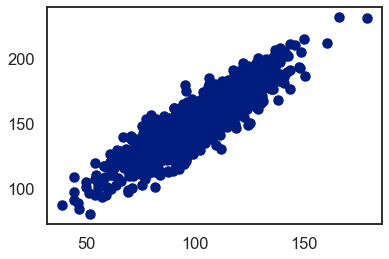

In [80]:
# generate related variables
from numpy import mean
from numpy import std
from numpy.random import randn
from numpy.random import seed
from matplotlib import pyplot
# seed random number generator
seed(1)
# prepare data
df= 20 * randn(1000) + 100
d= data1 + (10 * randn(1000) + 50)
# summarize
print('data1: mean=%.3f stdv=%.3f' % (mean(data1), std(data1)))
print('data2: mean=%.3f stdv=%.3f' % (mean(data2), std(data2)))
# plot
pyplot.scatter(data1, data2)
pyplot.show()